In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../')

# src imports
from src.load_satellites_data import load_satellites_data, filter_data_tue, load_satellites_data_sorted

In [4]:
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib import font_manager

# font_dirs = ['C:/Users/timol/OneDrive/Documents/Studium/Master/Semester1/DataLiteracy/roboto-condensed']
# font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

# for font_file in font_files:
#     font_manager.fontManager.addfont(font_file)
rgb.tue_red, rgb.mps_green, rgb.tue_blue

(array([0.55294118, 0.17647059, 0.22352941]),
 array([0.06666667, 0.4       , 0.3372549 ]),
 array([0.        , 0.41176471, 0.66666667]))

### Load Data

In [6]:
path_tue = '../dat/satellite_above_tübingen_90.txt'
path_rome = '../dat/satellite_above_rome_90.txt'

data_rome = load_satellites_data(path_rome)
data_tue = load_satellites_data(path_tue, n_samples=15)

Error decoding JSON object 47: Expecting value: line 1 column 1 (char 0)
<class 'pandas.core.frame.DataFrame'>
Index: 138137 entries, 0 to 2913
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   satid          138137 non-null  int64  
 1   satname        138137 non-null  object 
 2   intDesignator  138137 non-null  object 
 3   launchDate     138137 non-null  object 
 4   satlat         138137 non-null  float64
 5   satlng         138137 non-null  float64
 6   satalt         138137 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.4+ MB
Error decoding JSON object 64: Expecting value: line 1 column 1 (char 0)
<class 'pandas.core.frame.DataFrame'>
Index: 46625 entries, 0 to 3102
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   satid          46625 non-null  int64  
 1   satname        46625 non-null  object 
 2   i

## PLOTS

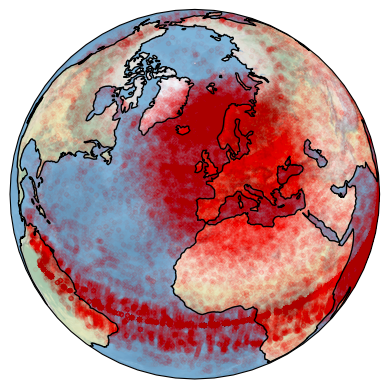

In [4]:
# TÜBINGEN
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.set_extent([-50, 50, 20, 90], crs=ccrs.PlateCarree())
ax.scatter(np.array(data_tue['satlng']), np.array(data_tue['satlat']), alpha=.01, c='r', marker='.', transform=data_crs)


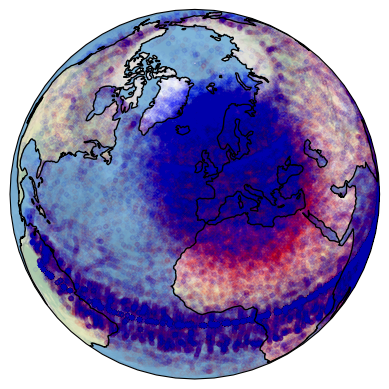

In [5]:
lats_rome, longs_rome = data_rome['satlat'], data_rome['satlng']
lats_tue, longs_tue = data_tue['satlat'], data_tue['satlng']

# ROME
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img()
ax.coastlines()
ax.scatter(longs_rome, lats_rome, alpha=.01, c='r', marker='.', transform=data_crs)

# TÜBINGEN
ax.scatter(longs_tue, lats_tue, alpha=.01, c='b', marker='.', transform=data_crs)

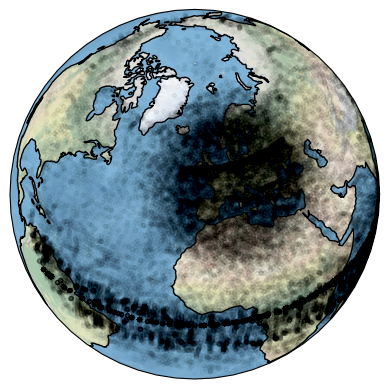

In [7]:
# TODO: adapt to new source code... not neccessary anymore as plot is not used in report
"""
# COMMON
dfs_common = []
lats_common = []
longs_common = []

for idx in random_indices:
    data_t = data_list_tue[idx]
    df_t = pd.DataFrame(data_t['above'])
    data_r = data_list_rome[idx]
    df_r = pd.DataFrame(data_r['above'])
    df_common = df_r.loc[df_r['satid'].isin(df_t['satid'])]
    lats_common.append(df_common['satlat'])
    longs_common.append(df_common['satlng'])
    dfs_common.append(df_common)

data_common = pd.concat(dfs_common, axis=0)

ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.set_extent([-50, 50, 20, 90], crs=ccrs.PlateCarree())
for lat, long in zip(lats_common, longs_common):
    ax.scatter(long, lat, alpha=.01, color='k', marker='.', transform = data_crs)

plt.show()
"""

Here's to why our data looks so oddly distributed:

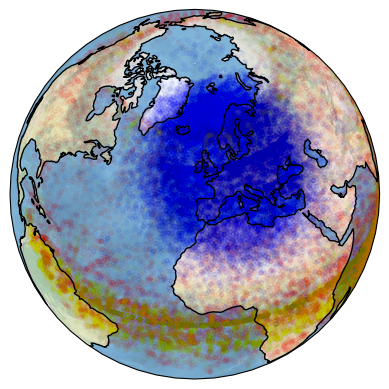

In [5]:
# satellites with altitude > 10000
data_tue_high = data_tue[(data_tue['satalt'] > 10000) & (data_tue['satalt'] < 35000)]
# satellites with altitude < 10000
data_tue_low = data_tue[data_tue['satalt'] < 10000]
# satellites with altitude > 20000
data_tue_higher = data_tue[data_tue['satalt'] > 35000]

data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
ax.scatter(np.array(data_tue_high['satlng']), np.array(data_tue_high['satlat']), alpha=.01, color='r', marker='.', transform=data_crs)
ax.scatter(np.array(data_tue_low['satlng']), np.array(data_tue_low['satlat']), alpha=.01, color='b', marker='.', transform=data_crs)
ax.scatter(np.array(data_tue_higher['satlng']), np.array(data_tue_higher['satlat']), alpha=.01, color='y', marker='.', transform=data_crs)

Plot different orbits: https://de.wikipedia.org/wiki/Satellitenorbit

In [20]:
# LEO orbit: below 2000 km
data_tue_LEO = data_tue[data_tue['satalt'] < 2000]
# MEO orbit: 2000 - 35786 km
data_tue_MEO = data_tue[(data_tue['satalt'] >= 2000) & (data_tue['satalt'] < 35786)]
# HEO orbit: above 35786 km
data_tue_HEO = data_tue[data_tue['satalt'] >= 35786]


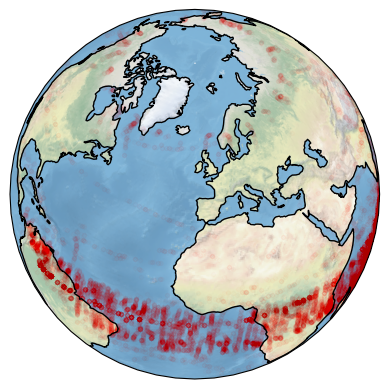

In [6]:
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.scatter(np.array(data_tue_LEO['satlng']), np.array(data_tue_LEO['satlat']), alpha=.01, color='y', marker='.', transform=data_crs)
#ax.scatter(np.array(data_tue_MEO['satlng']), np.array(data_tue_MEO['satlat']), alpha=.01, color='b', marker='.', transform=data_crs)
ax.scatter(np.array(data_tue_HEO['satlng']), np.array(data_tue_HEO['satlat']), alpha=.01, color='r', marker='.', transform=data_crs)

In [21]:
r = 6371 # earth radius (cancels out in the formula)
gamma = 14.172
tue_lat = 48.782536
tue_long = 9.176995

cutoff_lat = (tue_lat - gamma, tue_lat + gamma)
cutoff_lng = (tue_long - gamma, tue_long + gamma)
print(cutoff_lat)
print(cutoff_lng)

(34.610535999999996, 62.954536000000004)
(-4.995005000000001, 23.348995000000002)


C:\Users\timol\AppData\Local\Temp\ipykernel_18220\195739344.py:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


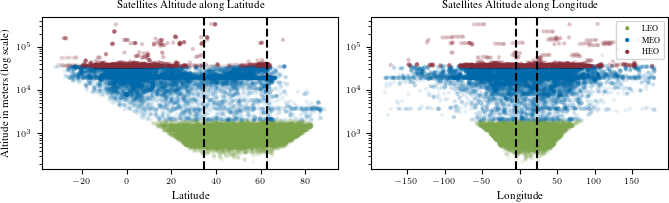

In [26]:
plt.rcParams.update(
    bundles.icml2022(
        column="full",
        nrows=1,
        ncols=2,
        usetex=True,
    )
)

fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Satellites Altitude along Latitude and Longitude')

ax1.scatter(data_tue_LEO['satlat'], data_tue_LEO['satalt'], color=rgb.tue_green, marker=".", alpha=.1, edgecolors="none")
ax1.scatter(data_tue_MEO['satlat'], data_tue_MEO['satalt'], color=rgb.tue_blue, marker=".", alpha=.1, edgecolors="none")
ax1.scatter(data_tue_HEO['satlat'], data_tue_HEO['satalt'], color=rgb.tue_red, marker=".", alpha=.1, edgecolors="none")
# Plot vertical lines at cutoff_lat
ax1.axvline(cutoff_lat[0], color='k', linestyle='--')
ax1.axvline(cutoff_lat[1], color='k', linestyle='--')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Altitude in meters (log scale)')
ax1.set_title('Satellites Altitude along Latitude')
ax1.set_yscale('log')

ax2.scatter(data_tue_LEO['satlng'], data_tue_LEO['satalt'], color=rgb.tue_green, marker=".", alpha=.1, edgecolors="none")
ax2.scatter(data_tue_MEO['satlng'], data_tue_MEO['satalt'], color=rgb.tue_blue, marker=".", alpha=.1, edgecolors="none")
ax2.scatter(data_tue_HEO['satlng'], data_tue_HEO['satalt'], color=rgb.tue_red, marker=".", alpha=.1, edgecolors="none")
# Plot vertical lines at cutoff_lat
ax2.axvline(cutoff_lng[0], color='k', linestyle='--')
ax2.axvline(cutoff_lng[1], color='k', linestyle='--')
ax2.set_xlabel('Longitude')
# ax2.set_ylabel('Altitude in meters (log scale)')
ax2.set_title('Satellites Altitude along Longitude')
ax2.set_yscale('log')
leg = ax2.legend(['LEO', 'MEO', 'HEO'], loc='upper right')
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.savefig('../doc/fig/satellite_altitude.pdf')

plt.show()


## Extract surface where we captured all the satellites

Distance in spherical coordinates:
 ${\mathbf D} = \sqrt{r^2+r'^2-2rr'(\sin{\theta}\sin{\theta'}\cos{(\varphi-\varphi')} + \cos{\theta}\cos{\theta'})}$

 Since the latitude is 0 at the equator, we need to subtract the latitude values from 90°.
 
 We also need to transform degrees to radians for the trigonometric functions of the math library!


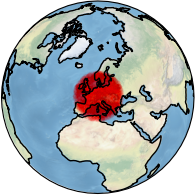

In [8]:
# Usage example:
data_tue_masked = filter_data_tue(data_tue)

# Plot
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(9, 48))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
ax.scatter(np.array(data_tue_masked['satlng']), np.array(data_tue_masked['satlat']), alpha=.01, color='r', marker='.', transform=data_crs)

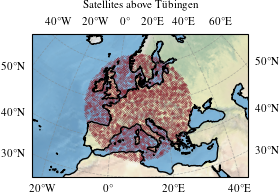

In [42]:
extend = [-25, 45, 30, 65]

# Plot
crs = ccrs.PlateCarree()
crs_globe = ccrs.Orthographic(9, 48)

plt.rcParams.update(
    bundles.icml2022(
        column="half",
        nrows=1,
        ncols=1,
        usetex=True,
    )
)

fig, ax = plt.subplots(
    1, 1, 
    subplot_kw={"projection":crs_globe}
)

lats = np.array(data_tue_masked['satlat'])
longs = np.array(data_tue_masked['satlng'])

ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
gl = ax.gridlines(
    draw_labels=True, linewidth=.5, color='gray', alpha=0.5, linestyle='--'
)

ax.scatter(longs, lats, alpha=1, color=rgb.tue_red, marker='.', s=0.1 , transform=crs)
ax.set_extent(extend, crs=ccrs.PlateCarree())

ax.set_title('Satellites above Tübingen')

plt.savefig('../doc/fig/satellite_above_tuebingen.pdf')

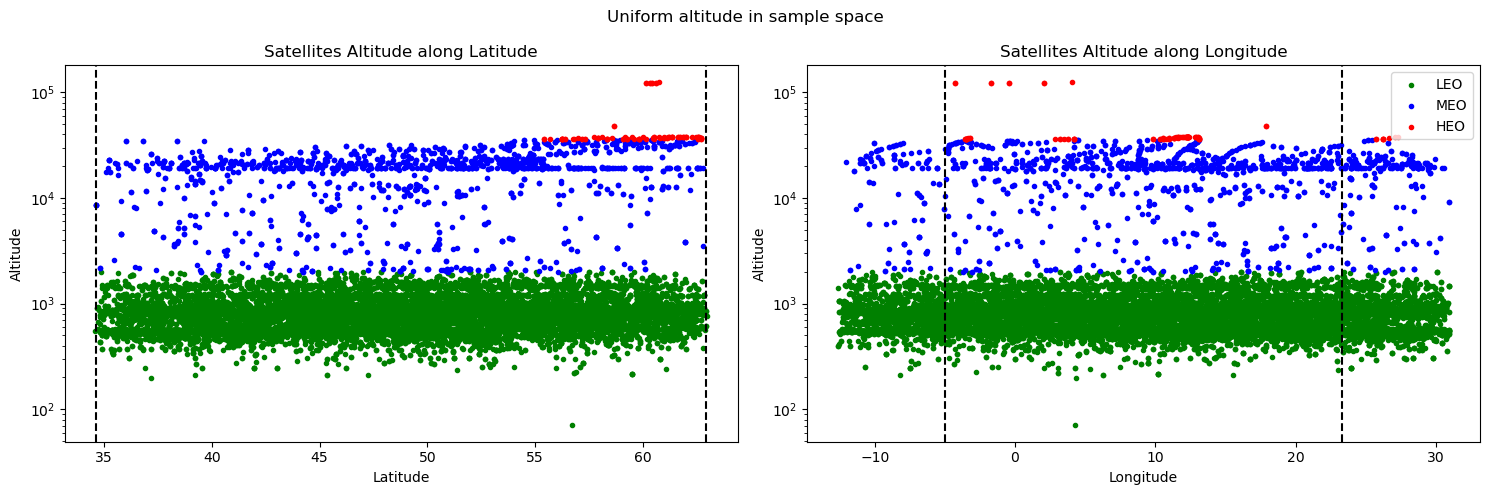

In [14]:
# LEO orbit: below 2000 km
data_tue_masked_LEO = data_tue_masked[data_tue_masked['satalt'] < 2000]
# MEO orbit: 2000 - 35786 km
data_tue_masked_MEO = data_tue_masked[(data_tue_masked['satalt'] >= 2000) & (data_tue_masked['satalt'] < 35786)]
# HEO orbit: above 35786 km
data_tue_masked_HEO = data_tue_masked[data_tue_masked['satalt'] >= 35786]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Uniform altitude in sample space')

# ax1.scatter(lats, alts)
ax1.scatter(data_tue_masked_LEO['satlat'], data_tue_masked_LEO['satalt'], color='g', marker=".")
ax1.scatter(data_tue_masked_MEO['satlat'], data_tue_masked_MEO['satalt'], color='b', marker=".")
ax1.scatter(data_tue_masked_HEO['satlat'], data_tue_masked_HEO['satalt'], color='r', marker=".")
# Plot vertical lines at cutoff_lat
ax1.axvline(cutoff_lat[0], color='k', linestyle='--')
ax1.axvline(cutoff_lat[1], color='k', linestyle='--')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Altitude')
ax1.set_title('Satellites Altitude along Latitude')
ax1.set_yscale('log')

# ax2.scatter(longs, alts)
ax2.scatter(data_tue_masked_LEO['satlng'], data_tue_masked_LEO['satalt'], color='g', marker=".")
ax2.scatter(data_tue_masked_MEO['satlng'], data_tue_masked_MEO['satalt'], color='b', marker=".")
ax2.scatter(data_tue_masked_HEO['satlng'], data_tue_masked_HEO['satalt'], color='r', marker=".")
# Plot vertical lines at cutoff_lat
ax2.axvline(cutoff_lng[0], color='k', linestyle='--')
ax2.axvline(cutoff_lng[1], color='k', linestyle='--')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Altitude')
ax2.set_title('Satellites Altitude along Longitude')
ax2.set_yscale('log')
ax2.legend(['LEO', 'MEO', 'HEO'], loc='upper right')

plt.tight_layout()
plt.show()

In [18]:
def kernel_density(lats, longs, projection, k, extend):
    geo = ccrs.Geodetic()

    h = projection.transform_points(geo, lats, longs)[:, :2].T

    kde = stats.gaussian_kde(h)

    # Coordinates of the four corners of the map.
    x0, x1, y0, y1 = extend
    # Create the grid.
    tx, ty = np.meshgrid(np.linspace(x0, x1, 2 * k),
                        np.linspace(y0, y1, k))
    # Reshape the grid for the kde() function.
    mesh = np.vstack((tx.ravel(), ty.ravel()))
    # Evaluate the kde() function on the grid.
    v = kde(mesh).reshape((k, 2 * k))
    # output is reshaped to grid mesh shape
    
    return v

## Starlink Mesh

Error decoding JSON object 226: Expecting value: line 1 column 1 (char 0)
<class 'pandas.core.frame.DataFrame'>
Index: 706083 entries, 0 to 3132
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   satid          706083 non-null  int64  
 1   satname        706083 non-null  object 
 2   intDesignator  706083 non-null  object 
 3   launchDate     706083 non-null  object 
 4   satlat         706083 non-null  float64
 5   satlng         706083 non-null  float64
 6   satalt         706083 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 43.1+ MB


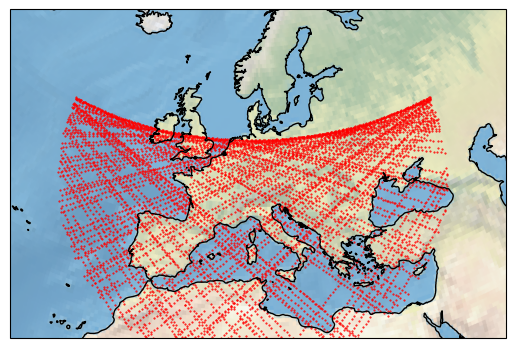

In [6]:
def filter_data_tue(df):
    return df[df['satname'].str.contains("STARLINK-1", case=False, na=False)]

extend = [-25, 45, 30, 65]

path_tue_5sek = '../dat/satellite_above_tue_90_5sek.txt'
data_tue_5sek = load_satellites_data_sorted(path_tue_5sek)
# Usage example:
data_tue_5sek = filter_data_tue(data_tue_5sek)

# Plot
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(9, 48))
ax.set_extent(extend, crs=ccrs.PlateCarree())   # Adjusted extent for further zooming out
ax.stock_img()
ax.coastlines()

if not data_tue_5sek.empty:
    ax.scatter(np.array(data_tue_5sek['satlng']), np.array(data_tue_5sek['satlat']), color='r', marker='.', transform=data_crs, s=1)

plt.show()